# Getting Started with Sionna tutorial

### Imports and Basics

In [1]:
import os
if os.getenv("CUDA_VISIBLE_DEVICES") is None:
    gpu_num = 0 # Use "" to use the CPU
    os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import sionna as sn

import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

# Avoid warnings from TensorFlow
tf.get_logger().setLevel('ERROR')

import numpy as np

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow.keras import Model

In [2]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


(This could be due to not having an nvidia GPU)

### A note on random number generation

In [3]:
sn.config.seed = 40

# Python RNG - use instead of
# import random
# random.randint(0, 10)
print(sn.config.py_rng.randint(0, 10))

# Numpy RNG - use instead of
# import numpy as np
# np.random.randint(0, 10)
print(sn.config.np_rng.integers(0, 10))

# TensorFlow RNG - use instead of
# import tensorflow as tf
# tf.random.uniform(shape=[1], minval=0, maxval=10, dtype=tf.int32)
print(sn.config.tf_rng.uniform(shape=[1], minval=0, maxval=10, dtype=tf.int32))

7
5
tf.Tensor([2], shape=(1,), dtype=int32)


### Sionna Data-Flow and Design Paradigms

Sionna inherently parallelizes simulations via batching, i.e. each element in the batch dimension is simulated independently. This means the first tensor dimension is always used for inter-frame parallelization similar to an outer for-loop in Matlab / NumPy simulations, but operations can be operated in parallel.

tf.float32 is used as preferred datatype and tf.complex64 is used for complex-valued datatypes.

### Hello Sionna

Simple simulation transmitting QAM symbols over an AWGN channel.

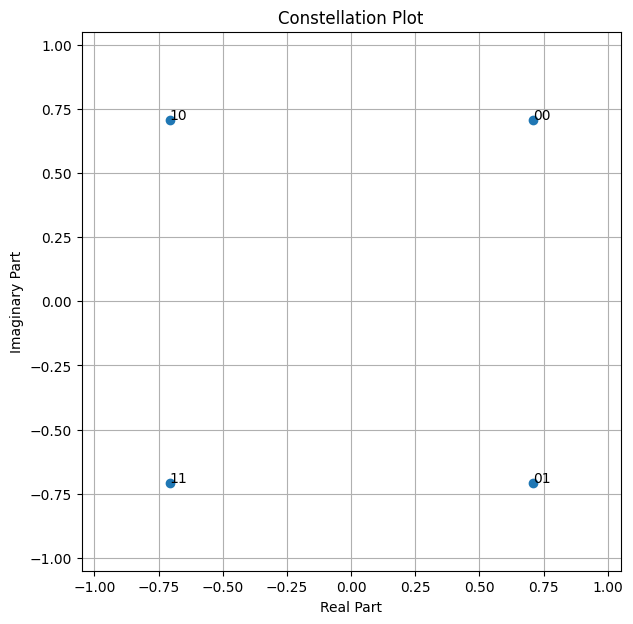

In [7]:
NUM_BITS_PER_SYMBOL = 2 # QPSK
# NUM_BITS_PER_SYMBOL = 4 # 16-QAM

constellation = sn.mapping.Constellation('qam', NUM_BITS_PER_SYMBOL)

fig = constellation.show()